Big Data And Society
=====


#Data Scrapping

TODO

In [61]:
import urllib2

def get_json(request):
    response = urllib2.urlopen(request)
    return response.read()

In [71]:
# Request geoJSON from API
api = 'http://tiles.trulia.com/crimes/'
boston = 'drt3n,drt2w,drt2z,drt2v,drt3j,drt3p,drt2x,drt2t,drt2y'
ny = 'dr72'+','+'dr5q'+',''dr5x'+','+'dr5p'+','+'dr70'+','+'dr78'+','+'dr5w'+','+'dr5n'+','+'dr5r'
sf = '9qb'+','+'9q9'+',''9qc'+','+'9q8'

# Choose a city
quads = ny

#Set a maximum number of crime events by county
countyCap = 100000
# Set a maximum number of crimes 
limit = 100000
# Get the latest version of crimes
version = 'E36_21'
# Build a string with the request
api_request = api + '?geohashes=' + quads + '&' + 'countyCap=' + str(countyCap) + '&' + 'limit=' + str(limit) + '&' + 'v=' + version

# get a dictionary with the function
json_dict = json.loads(get_json(api_request))

# Parse the dictionary
features_list = json_dict['features']
features_list

[{u'geometry': {u'coordinates': [-74.21438, 40.7209073], u'type': u'Point'},
  u'id': 99822672,
  u'properties': {u'category': u'Shooting',
   u'date': u'2015-11-27T09:57:00',
   u'description': u'Shooting/Stabbing. NPD o/s w/crime scene set up for a shooting, perp fled',
   u'ext_id': u'70400715',
   u'source': 1,
   u'url': u'http://spotcrime.com/crime/70400715-861e59a6bd4325f476b4e7c1d22393ca'},
  u'type': u'Feature'},
 {u'geometry': {u'coordinates': [-73.9785406, 40.6949444], u'type': u'Point'},
  u'id': 99822659,
  u'properties': {u'category': u'Shooting',
   u'date': u'2015-11-27T04:11:00',
   u'description': u'Shooting/Stabbing. PD on scene reporting a person shot. Level 1 mobilization called.',
   u'ext_id': u'70400702',
   u'source': 1,
   u'url': u'http://spotcrime.com/crime/70400702-c41e0e00d9e5c2e2221c2e764bc296fc'},
  u'type': u'Feature'},
 {u'geometry': {u'coordinates': [-74.379412, 40.861415], u'type': u'Point'},
  u'id': 99820016,
  u'properties': {u'category': u'Shooti

In [72]:
# function that takes a dictionary and creates a point and extracts a value
def label_point(geometry_dict, label):
    x = geometry_dict['geometry']['coordinates'][0]
    y = geometry_dict['geometry']['coordinates'][1]
    # create a point
    pt = (x, y)
    
    # extract a specific value
    property_vals = geometry_dict['properties']
    property = property_vals[label]
    
    return pt, property

In [84]:
# create empty lists for our new objects
pts = np.zeros((len(features_list), 2))
labels = []
label = 'category'
# for every dictionary in the json
for i, geometry_dict in enumerate(features_list):
    # get a point and a label
    pt, lab = label_point(geometry_dict, label)
    
    # add the new objects to their lists
    pts[i] = pt
    labels.append(lab)
pts

array([[-74.21438   ,  40.7209073 ],
       [-73.9785406 ,  40.6949444 ],
       [-74.379412  ,  40.861415  ],
       ..., 
       [-73.86634132,  40.86544829],
       [-73.98942276,  40.71970049],
       [-73.947642  ,  40.69479955]])

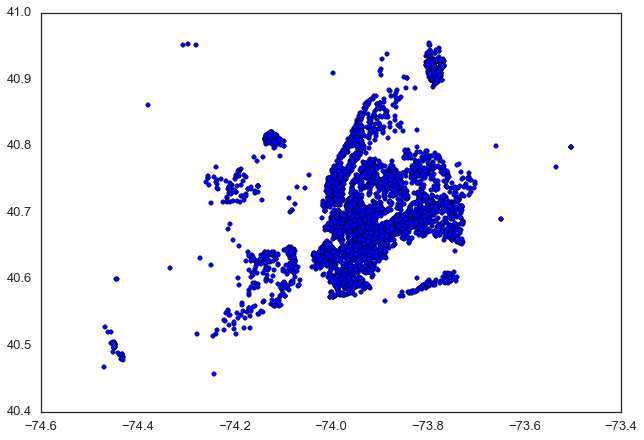

In [83]:
plt.scatter(pts[:,0], pts[:,1])